In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features.csv')


## Collecting the datasets and Merging 

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
test


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [6]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


#### Train DF

In [7]:
train = train.merge(features, on=['Store','Date'], how='left')
train = train.merge(stores, on='Store', how='left')

In [8]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


#### Test DF

In [9]:
test = test.merge(features, on=['Store','Date'], how='left')
test = test.merge(stores, on=['Store'], how='left')

In [10]:
test

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


## Data Cleaning 

In [11]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [13]:
train = train.drop(columns=['IsHoliday_y'])

train['Date'] = pd.to_datetime(train['Date'])

In [14]:
train.isnull().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [15]:
null_percent = (train.isnull().sum() / len(train)) * 100
print(null_percent)


Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday_x      0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64


In [16]:
train.corr(numeric_only=True)['Weekly_Sales'].sort_values(ascending=False)


Weekly_Sales    1.000000
Size            0.243828
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
IsHoliday_x     0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [17]:
train['Store']

0          1
1          1
2          1
3          1
4          1
          ..
421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, Length: 421570, dtype: int64

In [18]:
train['Dept']

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [19]:
train['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [20]:
train['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [21]:
train['MarkDown1'].value_counts()

MarkDown1
460.73     102
1.50       102
175.64      93
5924.71     75
686.24      75
          ... 
318.51      42
243.47      42
945.96      42
196.40      42
187.88      42
Name: count, Length: 2277, dtype: int64

In [22]:
markdown_cols = [f'MarkDown{i}' for i in range(1, 6)]
train[markdown_cols] = train[markdown_cols].fillna(0)
test[markdown_cols] = test[markdown_cols].fillna(0)


In [23]:

test = test.drop(columns=['IsHoliday_y'])

In [24]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [25]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday_x', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')

In [26]:
# Convert Date
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Time features
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek


In [27]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,2010,2,5,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,2010,2,6,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,2010,2,7,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,2010,2,8,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,2010,3,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,9,39,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,10,40,4
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,10,41,4
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,10,42,4


In [28]:
# Drop Date column
train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])

In [29]:
# num_cols = train.drop(columns=['Weekly_Sales']).select_dtypes(include=['int64','float64']).columns
# scaler = StandardScaler()

# train[num_cols] = scaler.fit_transform(train[num_cols])
# test[num_cols] = scaler.transform(test[num_cols])

In [30]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,DayOfWeek
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.0
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,2010.968591,6.449510,25.826762,4.0
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.796876,3.243217,14.151887,0.0
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.0,4.0
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.0,4.0
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,2011.000000,6.000000,26.0,4.0
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,2012.000000,9.000000,38.0,4.0
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.0,4.0


In [31]:
# 1) Encode
type_map = {'A': 0, 'B': 1, 'C': 2}
for df in [train, test]:
    df['Type'] = df['Type'].map(type_map).astype('int8')
    df['IsHoliday_x'] = df['IsHoliday_x'].astype('int8')

In [32]:
# 2) Normalize only continuous features (fit on train, apply to both)
scale_cols = [
    'Temperature','Fuel_Price','CPI','Unemployment','Size',
    'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'
]

scaler = StandardScaler()
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols]  = scaler.transform(test[scale_cols])


In [33]:
train

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,24924.50,0,-0.963798,-1.720834,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.018774,0.078201,0,0.239209,2010,2,5,4
1,1,1,46039.49,1,-1.169783,-1.773177,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.022498,0.078201,0,0.239209,2010,2,6,4
2,1,1,41595.55,0,-1.092810,-1.847330,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.023697,0.078201,0,0.239209,2010,2,7,4
3,1,1,19403.54,0,-0.729625,-1.744825,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.024476,0.078201,0,0.239209,2010,2,8,4
4,1,1,21827.90,0,-0.736672,-1.605243,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.025255,0.078201,0,0.239209,2010,3,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,0.259647,1.387032,0.324919,-0.169009,-0.084391,0.132976,0.386317,0.531461,0.388404,1,-0.303489,2012,9,39,4
421566,45,98,628.10,0,0.260189,1.360860,0.405901,-0.173069,-0.081259,0.300498,0.160955,0.535467,0.379281,1,-0.303489,2012,10,40,4
421567,45,98,1061.02,0,-0.304645,1.393575,-0.104718,-0.173069,-0.083235,-0.124229,0.553226,0.539472,0.379281,1,-0.303489,2012,10,41,4
421568,45,98,760.01,0,-0.196231,1.325965,-0.096830,-0.173069,-0.084087,-0.165720,-0.029775,0.539564,0.379281,1,-0.303489,2012,10,42,4


In [35]:
test

,Store,Dept,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,0,-0.258569,0.054466,0.690037,0.839355,-0.075471,0.656503,0.255405,1.334573,-0.744536,0,0.239209,2012,11,44,4
1,1,1,0,0.062335,-0.102563,1.459136,0.489901,-0.077377,0.915043,1.067440,1.335046,-0.744536,0,0.239209,2012,11,45,4
2,1,1,0,-0.388665,-0.237782,1.174118,-0.115620,-0.065892,0.012843,1.176416,1.335853,-0.744536,0,0.239209,2012,11,46,4
3,1,1,1,-0.209241,-0.327202,-0.281953,-0.172249,13.464284,-0.224218,-0.323093,1.337105,-0.744536,0,0.239209,2012,11,47,4
4,1,1,0,-0.420105,-0.335925,-0.021487,-0.173069,0.609576,-0.239455,1.260466,1.338357,-0.744536,0,0.239209,2012,11,48,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,0,0.865136,0.606249,0.372121,0.018695,-0.084120,0.350964,0.358140,NaN,NaN,1,-0.303489,2013,6,26,4
115060,45,98,0,0.943735,0.551725,1.074025,0.273104,0.020737,1.210504,-0.035137,NaN,NaN,1,-0.303489,2013,7,27,4
115061,45,98,0,1.045102,0.551725,0.198247,0.186317,-0.069158,-0.086864,0.115882,NaN,NaN,1,-0.303489,2013,7,28,4
115062,45,98,0,1.233199,0.819983,0.061367,0.032864,-0.047731,-0.184909,-0.143386,NaN,NaN,1,-0.303489,2013,7,29,4


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Split train into 70% train, 30% validation
split_idx = int(len(train) * 0.7)
train_set = train.iloc[:split_idx]
val_set   = train.iloc[split_idx:]

X_train = train_set.drop(columns=['Weekly_Sales'])
y_train = train_set['Weekly_Sales']
X_val   = val_set.drop(columns=['Weekly_Sales'])
y_val   = val_set['Weekly_Sales']

# Train & evaluate
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print("R² Score:", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))


R² Score: 0.01485664139738141
MAE: 12208.059099008722


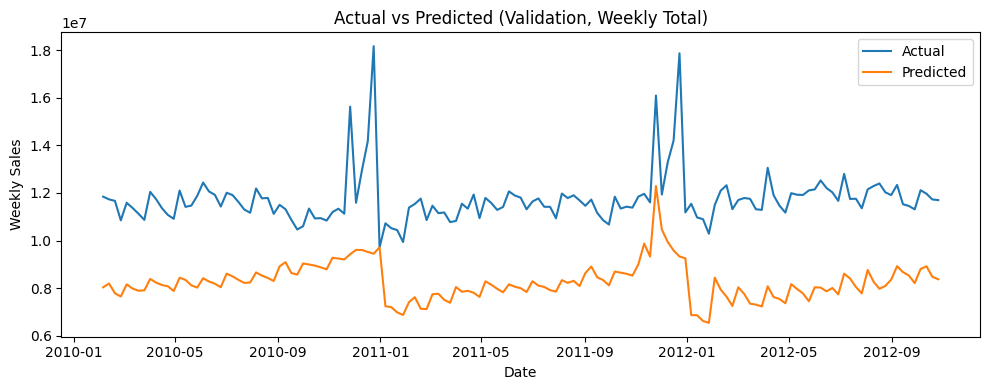

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume you already have: val_set, y_val, y_pred from your LR run
val_plot = val_set[['Year','Week']].copy()
val_plot['Actual'] = np.asarray(y_val)
val_plot['Pred']   = np.asarray(y_pred)

# Rebuild a weekly date (ISO year-week, use Friday = 5)
val_plot['Date'] = pd.to_datetime(
    val_plot['Year'].astype(str) + val_plot['Week'].astype(str) + '5',
    format='%G%V%u'
)

# Aggregate across all stores/depts per week
weekly = val_plot.groupby('Date', as_index=False)[['Actual','Pred']].sum()

# Plot
plt.figure(figsize=(10,4))
plt.plot(weekly['Date'], weekly['Actual'], label='Actual')
plt.plot(weekly['Date'], weekly['Pred'],   label='Predicted')
plt.title('Actual vs Predicted (Validation, Weekly Total)')
plt.xlabel('Date'); plt.ylabel('Weekly Sales')
plt.legend(); plt.tight_layout(); plt.show()


## Bonus

MAE: 1591.951806339001


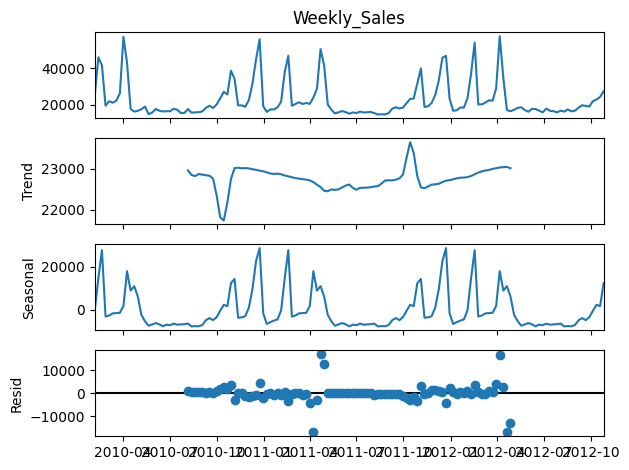

In [41]:
import pandas as pd
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# 1) Rolling features (per Store–Dept)
train = train.sort_values(['Store','Dept','Year','Week']).copy()
grp_cols = ['Store','Dept']

# Lag features
for l in [1, 4, 12]:
    train[f'lag_{l}'] = train.groupby(grp_cols)['Weekly_Sales'].shift(l).fillna(0)

# Rolling means
train['roll4']  = train.groupby(grp_cols)['Weekly_Sales'] \
    .transform(lambda s: s.shift(1).rolling(4,  min_periods=1).mean()).fillna(0)
train['roll12'] = train.groupby(grp_cols)['Weekly_Sales'] \
    .transform(lambda s: s.shift(1).rolling(12, min_periods=1).mean()).fillna(0)

# 2) Seasonal decomposition (example: Store=1, Dept=1)
sample = train[(train['Store']==1) & (train['Dept']==1)].copy()
sample = sample.sort_values(['Year','Week'])
sample.index = pd.to_datetime(
    sample['Year'].astype(str) + sample['Week'].astype(str) + '5',
    format='%G%V%u'
)
result = sm.tsa.seasonal_decompose(sample['Weekly_Sales'], model='additive', period=52)
result.plot()

# 3) Time-aware split
train_sorted = train.sort_values(['Year','Week'])
cut = int(len(train_sorted) * 0.7)
train_set = train_sorted.iloc[:cut]
val_set   = train_sorted.iloc[cut:]

X_train = train_set.drop(columns=['Weekly_Sales'])
y_train = train_set['Weekly_Sales']
X_val   = val_set.drop(columns=['Weekly_Sales'])
y_val   = val_set['Weekly_Sales']

# 4) XGBoost model
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 5) Evaluate
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))


In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Time-aware split
train_sorted = train.sort_values(['Year','Week'])
cut = int(len(train_sorted) * 0.7)
train_set = train_sorted.iloc[:cut]
val_set   = train_sorted.iloc[cut:]

X_train = train_set.drop(columns=['Weekly_Sales'])
y_train = train_set['Weekly_Sales']
X_val   = val_set.drop(columns=['Weekly_Sales'])
y_val   = val_set['Weekly_Sales']

# XGBoost model
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))


MAE: 3095.0387592418288
